In [1]:
# Carga de librerías y dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from statsmodels.formula.api import ols

df = pd.read_csv('salaries.csv')

In [2]:
display(df.head())

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2025,MI,FT,Customer Success Manager,57000,EUR,60000,NL,50,NL,L
1,2025,SE,FT,Engineer,165000,USD,165000,US,0,US,M
2,2025,SE,FT,Engineer,109000,USD,109000,US,0,US,M
3,2025,SE,FT,Applied Scientist,294000,USD,294000,US,0,US,M
4,2025,SE,FT,Applied Scientist,137600,USD,137600,US,0,US,M


In [3]:
# Tamaño del dataset
print(df.shape)

(88584, 11)


In [4]:
# Tipo de variables
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88584 entries, 0 to 88583
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           88584 non-null  int64 
 1   experience_level    88584 non-null  object
 2   employment_type     88584 non-null  object
 3   job_title           88584 non-null  object
 4   salary              88584 non-null  int64 
 5   salary_currency     88584 non-null  object
 6   salary_in_usd       88584 non-null  int64 
 7   employee_residence  88584 non-null  object
 8   remote_ratio        88584 non-null  int64 
 9   company_location    88584 non-null  object
 10  company_size        88584 non-null  object
dtypes: int64(4), object(7)
memory usage: 7.4+ MB


In [5]:
# Verificación de valores nulos
print(df.isnull().sum())

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64


In [6]:
# Estadísticas de variables numéricas
df.describe()
# Nota: remote_ratio está expresado en números pero es una variable categórica que se modificará más adelante

,work_year,salary,salary_in_usd,remote_ratio
count,88584.000000,8.858400e+04,88584.000000,88584.000000
mean,2024.034758,1.619323e+05,157567.798417,21.286011
std,0.620370,1.965317e+05,73531.373158,40.831018
min,2020.000000,1.400000e+04,15000.000000,0.000000
25%,2024.000000,1.060000e+05,106097.250000,0.000000
50%,2024.000000,1.470000e+05,146307.000000,0.000000
75%,2024.000000,1.995000e+05,198600.000000,0.000000
max,2025.000000,3.040000e+07,800000.000000,100.000000


In [7]:
# Modificación de Variables categóricas
experience_level = {
    "EN": "Junior",
    "MI": "Intermedio",
    "SE": "Experto",
    "EX": "Director"
}
employment_type = {
    "PT": "Tiempo Parcial",
    "FT": "Tiempo Completo",
    "CT": "Contrato",
    "FL": "Freelance"
}
remote_work_ratio = {
    0: "En Sitio",
    50: "Híbrido",
    100: "Remoto"
}

df["experience_level"] = df["experience_level"].map(experience_level)
df["employment_type"] = df["employment_type"].map(employment_type)
df["remote_ratio"] = df["remote_ratio"].map(remote_work_ratio)


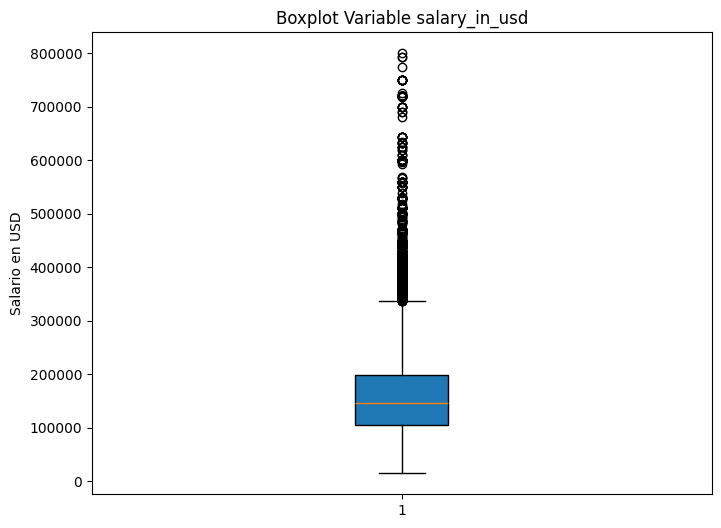

In [8]:
# Verificación de valores atípicos
plt.figure(figsize=(8, 6))

# Boxplot
plt.boxplot(df['salary_in_usd'], vert=True, patch_artist=True)
plt.title('Boxplot Variable salary_in_usd')
plt.ylabel('Salario en USD')

# Display the plot
plt.show()

In [9]:
# Número de valores atípicos
salary_data = df['salary_in_usd'].dropna()

# Calcular Q1, Q3 e IQR
Q1 = salary_data.quantile(0.25)
Q3 = salary_data.quantile(0.75)
IQR = Q3 - Q1

# Definir límites superiores e inferiores
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identificar valores atípicos
outliers = salary_data[(salary_data < lower_bound) | (salary_data > upper_bound)]
print("Número de valores atípicos en salary_in_usd:", len(outliers))

# Luego de validar la data se concluye que estos valores nos pueden aportar más información

Número de valores atípicos en salary_in_usd: 1750


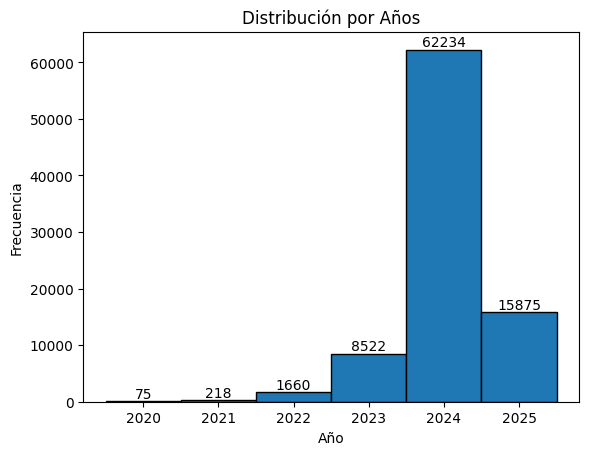

In [10]:
# Distribución por años

min_year = int(df['work_year'].min())
max_year = int(df['work_year'].max())

# Crear los bins centrados
bins = np.arange(min_year - 0.5, max_year + 1, 1)

plt.figure()
counts, bins, patches = plt.hist(df['work_year'].dropna(), bins=bins, edgecolor='black')
for count, patch in zip(counts, patches):
    # Compute the center of the bin
    x_center = patch.get_x() + patch.get_width() / 2
    plt.text(x_center, count, int(count), ha='center', va='bottom')

plt.title('Distribución por Años')
plt.xlabel('Año')
plt.ylabel('Frecuencia')
plt.xticks(np.arange(min_year, max_year + 1, 1))
plt.show()

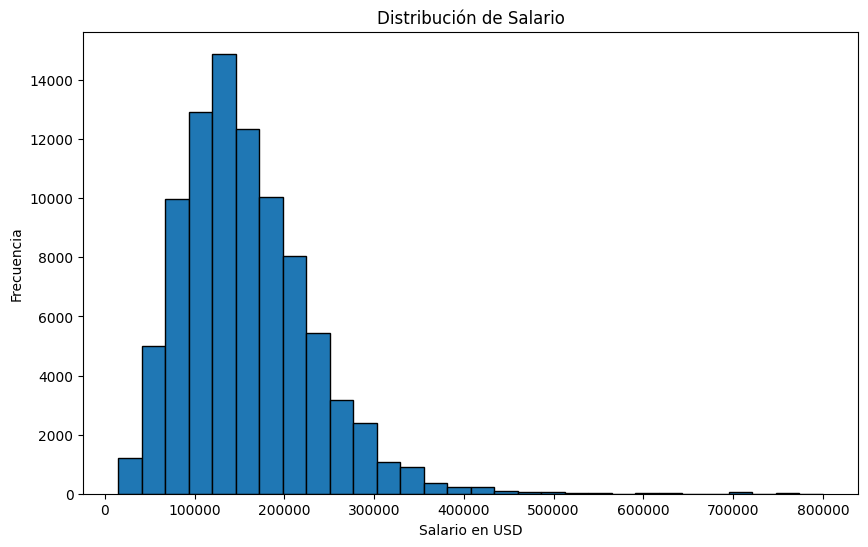

In [11]:
# Distribución de Salario

plt.figure(figsize=(10, 6))

# Histograma con 20 bins
plt.hist(df['salary_in_usd'], bins=30, edgecolor='black')
plt.title('Distribución de Salario')
plt.xlabel('Salario en USD')
plt.ylabel('Frecuencia')
plt.show()

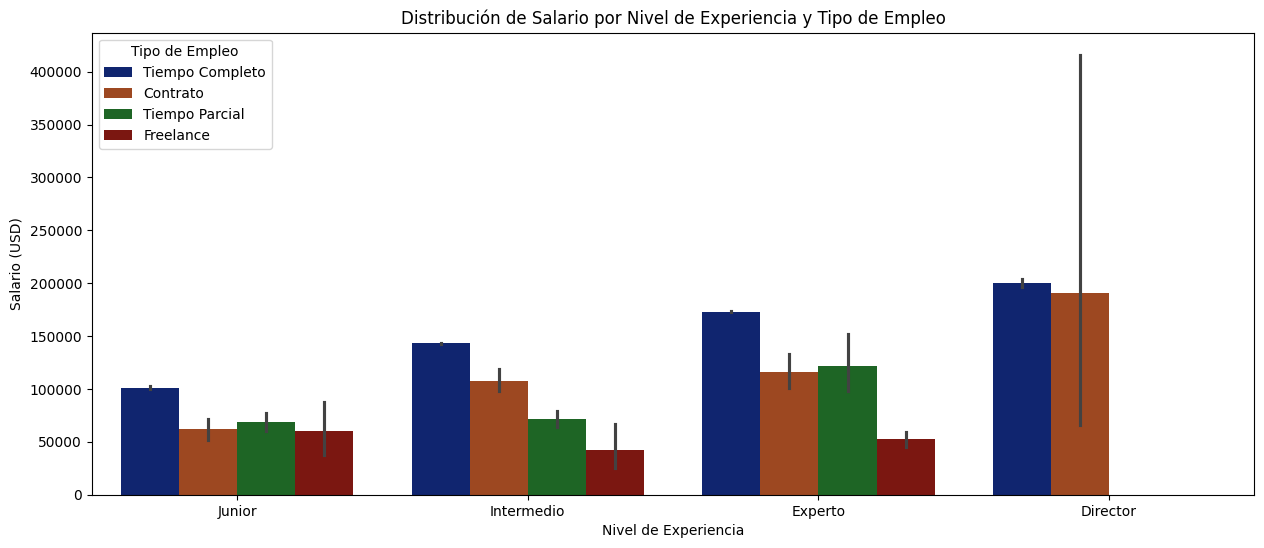

In [12]:
# Salary Distribution by Experience Level and Employment Type
plt.figure(figsize=(15, 6))
order = ['Junior', 'Intermedio', 'Experto', 'Director']
sns.barplot(data=df, x='experience_level', y='salary_in_usd', hue='employment_type',
            palette='dark', order=order)
plt.title("Distribución de Salario por Nivel de Experiencia y Tipo de Empleo")
plt.xlabel("Nivel de Experiencia")
plt.ylabel("Salario (USD)")
plt.legend(title="Tipo de Empleo")
plt.xticks(rotation=0)
plt.show()

C:\Users\2285g\AppData\Local\Temp\ipykernel_26084\2074808054.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='remote_ratio', palette='mako', order=order)


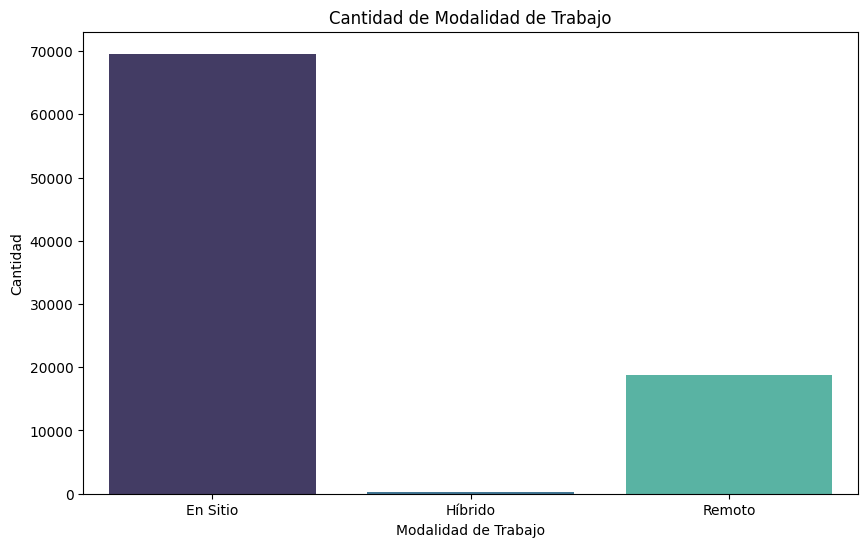

In [13]:

# Distribución de Modalidad de trabajo
order = ['En Sitio', 'Híbrido', 'Remoto']

plt.figure(figsize=(10, 6))


sns.countplot(data=df, x='remote_ratio', palette='mako', order=order)
plt.title('Cantidad de Modalidad de Trabajo')
plt.xlabel('Modalidad de Trabajo')
plt.ylabel('Cantidad')
plt.show()

C:\Users\2285g\AppData\Local\Temp\ipykernel_26084\1122571729.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=avg_salary, x='remote_ratio', y='salary_in_usd', palette='mako')


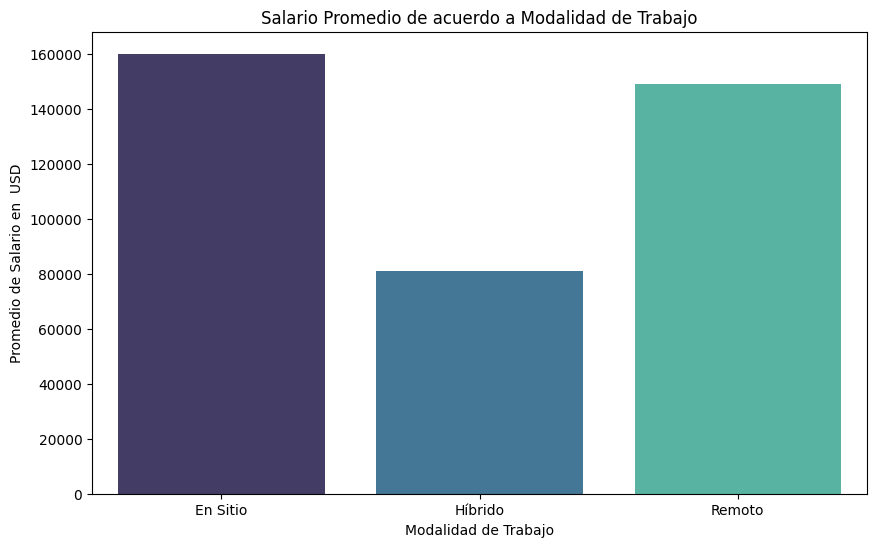

In [14]:
# Promedio de salario por modalidad de trabajo
avg_salary = df.groupby('remote_ratio')['salary_in_usd'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(data=avg_salary, x='remote_ratio', y='salary_in_usd', palette='mako')
plt.title('Salario Promedio de acuerdo a Modalidad de Trabajo')
plt.xlabel('Modalidad de Trabajo')
plt.ylabel('Promedio de Salario en  USD')
plt.show()

In [15]:
# Cuentas por categoría
categorical_cols = df.select_dtypes(include=['object', 'category']).columns
for col in categorical_cols:
    print(f"Cantidad de valores para {col}:")
    print(df[col].value_counts())
    print()

Cantidad de valores para experience_level:
experience_level
Experto       51596
Intermedio    26748
Junior         8381
Director       1859
Name: count, dtype: int64

Cantidad de valores para employment_type:
employment_type
Tiempo Completo    88111
Tiempo Parcial       233
Contrato             224
Freelance             16
Name: count, dtype: int64

Cantidad de valores para job_title:
job_title
Data Scientist                  13156
Data Engineer                   10883
Software Engineer                9596
Data Analyst                     8652
Machine Learning Engineer        6443
                                ...  
Marketing Data Scientist            1
Business Development Manager        1
Business Insights Manager           1
Platform Data Engineer              1
Customer Success Manager            1
Name: count, Length: 312, dtype: int64

Cantidad de valores para salary_currency:
salary_currency
USD    83994
GBP     2479
EUR     1559
CAD      279
INR       80
PLN       45
CHF     

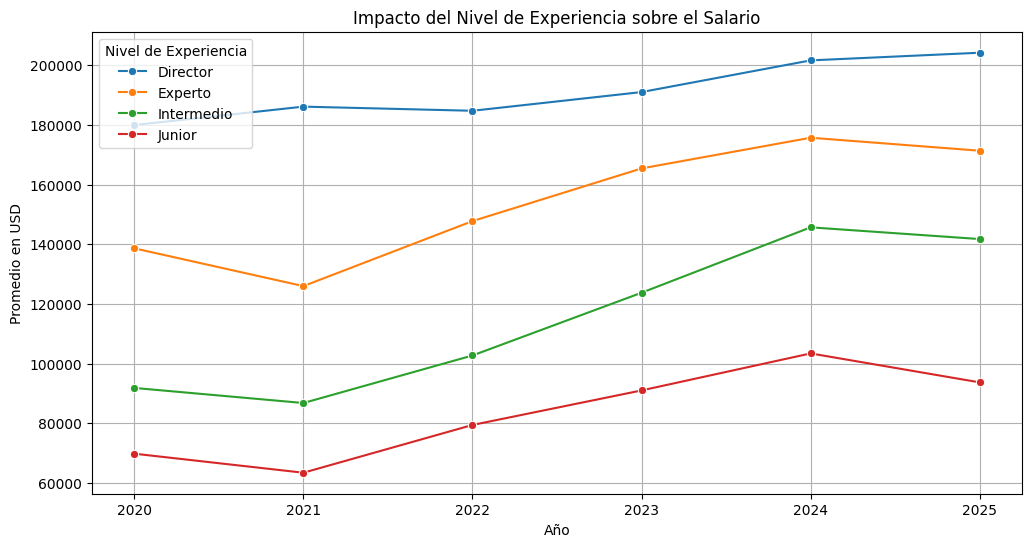

In [16]:
# Impacto del nivel de experiencia sobre el salario
salary_trends = df.groupby(['work_year', 'experience_level']).salary_in_usd.mean().reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(data=salary_trends, x='work_year', y='salary_in_usd', hue='experience_level', marker='o')
plt.title('Impacto del Nivel de Experiencia sobre el Salario')
plt.xlabel('Año')
plt.ylabel('Promedio en USD')
plt.legend(title='Nivel de Experiencia', loc='upper left')
plt.grid(True)
plt.show()

In [17]:
# ANOVA
# Hipótesis nula de que todos los niveles de experiencia tienen el mismo salario
model = ols('salary_in_usd ~ C(experience_level)', data=df).fit()

anova_table = sm.stats.anova_lm(model, typ=2)
print("ANOVA (Salario vs. Nivel de experiencia):")
print(anova_table)

# Se rechaza Hipótesis Nula

ANOVA (Salario vs. Nivel de experiencia):
                           sum_sq       df            F  PR(>F)
C(experience_level)  4.910049e+13      3.0  3372.699159     0.0
Residual             4.298556e+14  88580.0          NaN     NaN


In [18]:
# Mover columna salary_in_usd al final

column_to_move = 'salary_in_usd'
df[column_to_move] = df.pop(column_to_move)

In [19]:
df.to_csv('salaries_processed.csv', index=False)